In [146]:
%matplotlib inline

In [215]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn import cross_validation
from sklearn import grid_search

results = pickle.load(open("results-25perc-noloc.pickle", "rb"))
model_results = results[0]
df = results[1]
predictions = results[2]
best_score = results[3]
best_params = results[4]
best_features = results[5]
best_model = results[6]
print "Loaded"

Loaded


In [217]:
print "Best score:", best_score
#print "Best features:", best_features
print "Best params:", best_params

Best score: 0.70433750824
Best params: {'C': 4096.0, 'gamma': 4.0}


Build a histogram with percentages correct for each category

In [218]:
df_test = df[(df["is_test"] == True)]
df_test["prediction"] = predictions
#print df_test.head()
# Compare the percent correct to the results from earlier to make sure things are lined up right
print "Calculated accuracy:", sum(df_test["label"] == df_test["prediction"]) / float(len(df_test))
print "Model accuracy:", best_score

Calculated accuracy: 0.70433750824
Model accuracy: 0.70433750824


In [219]:
df_correct = df_test[(df_test["label"] == df_test["prediction"])]
df_incorrect = df_test[(df_test["label"] != df_test["prediction"])]
#df_correct.describe()
#df_test.describe()
#plt.hist(correct_labels)
#print df.describe()
print "Correct predictions:", df_correct.groupby(["label"])["prediction"].count()
print "Incorrect predictions:", df_incorrect.groupby(["label"])["prediction"].count()

Correct predictions: label
catalogNumber     5934
country            635
county            4484
family              17
recordNumber      3155
recordedBy       31305
sciname           1989
stateProvince     5905
Name: prediction, dtype: int64
Incorrect predictions: label
catalogNumber      2303
country            1535
county             2958
family              567
genus                 2
recordNumber       3541
recordedBy         4956
sciname            2306
specificEpithet       3
stateProvince      4255
Name: prediction, dtype: int64


Stats of text length for correct and incorrect

In [220]:
print df_correct.describe()
print df_incorrect.describe()

                  id           occid      text_len  scaled_area_x0  \
count    53424.00000    53424.000000  53424.000000    53424.000000   
mean   1113726.31688   978597.118355      5.154537        0.156736   
std     658411.13277    44500.197537      2.466101        0.230614   
min         96.00000   493281.000000      2.000000        0.000500   
25%     544726.25000   954792.000000      2.000000        0.008900   
50%    1108974.50000   962187.000000      6.000000        0.052300   
75%    1622944.75000  1016389.000000      7.000000        0.191800   
max    2361201.00000  1714829.000000     15.000000        0.983600   

       scaled_area_y0  scaled_line_x0  scaled_line_y0  scaled_word_x0  \
count    53424.000000     53424.00000    53424.000000    53424.000000   
mean         0.617217         0.17311        0.647624        0.383359   
std          0.278829         0.24084        0.280840        0.250083   
min          0.000900         0.00050        0.000900        0.000600   
25% 

In [221]:
#print model_results
d3_data = {}
for m in model_results:
    d3_data[m["feat_name"]] = {}
    d3_data[m["feat_name"]]["C"] = []
    d3_data[m["feat_name"]]["G"] = []
    d3_data[m["feat_name"]]["S"] = []
    #print m["feat_name"], m["model_params"], m["model_score"]
    for s in m["grid_scores"]:
        d3_data[m["feat_name"]]["C"].append(s[0]["C"])
        d3_data[m["feat_name"]]["G"].append(s[0]["gamma"])
        d3_data[m["feat_name"]]["S"].append(s[1])
        
#print d3_data

In [222]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

def d3_plot(X, Y, Z):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.set_xlabel("C", weight="bold", size="xx-large")
    ax.set_xticks([0, 5000, 10000, 15000])
    ax.set_xlim(0, max(X))
    ax.set_ylabel("gamma", weight="bold", size="xx-large")
    ax.set_yticks([0, 1.5, 3, 4.5])
    ax.set_ylim(0, max(Y))
    ax.set_zlabel("Accuracy", weight="bold", size="xx-large")
    #ax.set_zticks([0.5, 0.6, 0.70])
    ax.set_zlim(0.5, 0.75)
    ax.scatter(X, Y, Z, c='b', marker='o')
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    plt.show()



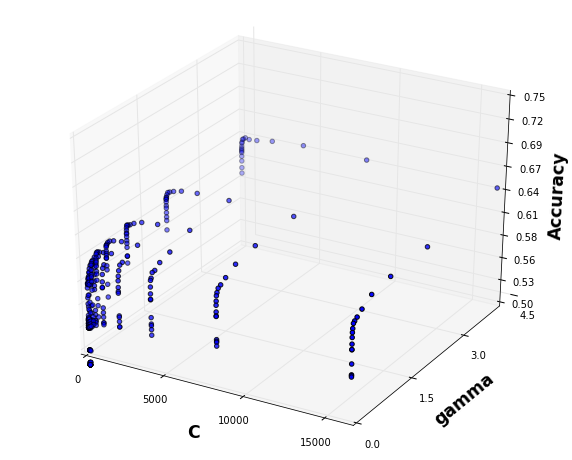

In [224]:
d3_plot(np.array(d3_data["area"]["C"]), np.array(d3_data["area"]["G"]), np.array(d3_data["area"]["S"]))

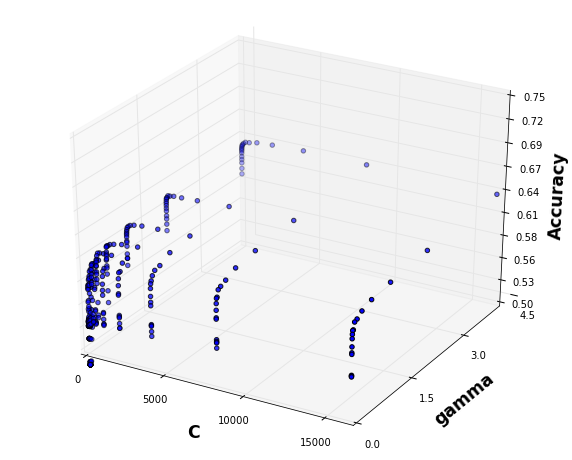

In [225]:
d3_plot(np.array(d3_data["line"]["C"]), np.array(d3_data["line"]["G"]), np.array(d3_data["line"]["S"]))

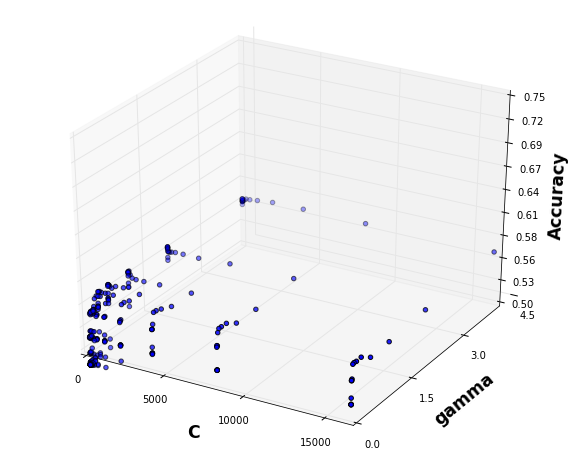

In [226]:
d3_plot(np.array(d3_data["word"]["C"]), np.array(d3_data["word"]["G"]), np.array(d3_data["word"]["S"]))